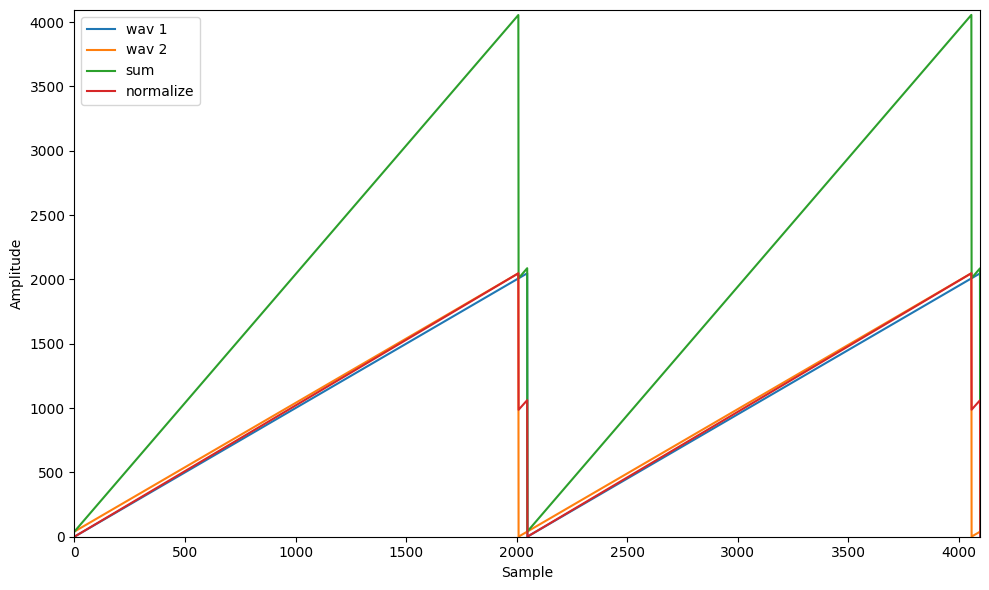

array([0.00000000e+00, 1.02016938e+00, 2.04033877e+00, ...,
       1.05864568e+03, 1.06057096e+03, 0.00000000e+00])

In [245]:
import numpy as np
import matplotlib.pyplot as plt

# wave_length = 256
wave_length = 4096
wave_height = 2048

# X軸の範囲を設定
x = np.linspace(0, wave_length, wave_length)

def get_sine(x, x_forward_step = 0):
    # Y軸の範囲を設定
    y = (wave_height >> 1) + ((wave_height >> 1) - 1) * np.sin(2 * np.pi * (x + x_forward_step) / wave_length)
    return y

def get_sawtooth(x, x_forward_step = 0):
    # Y軸の範囲を設定
    y = ((x + x_forward_step) % wave_height)#/ 2)
    return y

def mapping(value, start1, stop1, start2, stop2):
    return start2 + (stop2 - start2) * ((value - start1) / (stop1 - start1))

y = get_sawtooth(x, 0)
y2 = get_sawtooth(x, 40)
# y3 = (y + y2) / 2
# y4 = ((y * y2) / 1024) % wave_height

sum = y + y2
sub = abs(y - y2) % (wave_height >> 1)
y5 = mapping(sum, sub, wave_height, 0, wave_height >> 1)

# プロットを作成
plt.figure(figsize=(10, 6))
plt.plot(x, y, label = 'wav 1')
plt.plot(x, y2, label = 'wav 2')
# plt.plot(x, y3, label = 'mean')
plt.plot(x, sum, label = 'sum')
# plt.plot(x, y4, label = 'mul')
plt.plot(x, y5, label = 'normalize')

# X軸とY軸の範囲を設定
plt.xlim(0, wave_length - 1)
plt.ylim(0, (wave_height - 1) * 2)

plt.legend()
# plt.title('Waveforms')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

y5
